In [63]:
pip install pyspan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.0 MB/s eta 0:00:00


In [62]:
!pip install plotly

In [64]:
import pandas as pd
import pyspan as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
# Load dataset
df = pd.read_csv('/content/healthcare2_dataset.csv')
# Display the first few rows
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146.0,Elective,12/1/2022,Aspirin,Inconclusive
1,Cindrella,34,Female,O+,high bp,5/31/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,405.0,Emergency,6/14/2023,Lipitor,Normal
2,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404.0,Emergency,6/15/2023,Lipitor,Normal
3,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292.0,Emergency,2/8/2019,Lipitor,Normal
4,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480.0,Urgent,5/3/2020,Penicillin,Abnormal


In [106]:
df.shape

(10003, 15)

In [107]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146.0,Elective,12/1/2022,Aspirin,Inconclusive
1,Cindrella,34,Female,O+,high bp,5/31/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,405.0,Emergency,6/14/2023,Lipitor,Normal
2,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404.0,Emergency,6/15/2023,Lipitor,Normal
3,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292.0,Emergency,2/8/2019,Lipitor,Normal
4,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480.0,Urgent,5/3/2020,Penicillin,Abnormal


In [108]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [109]:
df.shape

(10003, 15)

In [125]:
# Assuming df is your dataframe
# Remove decimals by converting to integers
# Replace non-finite values with a suitable integer (e.g., -1)
df['Room Number'] = df['Room Number'].fillna(-1).astype(int)

# Alternatively, you can drop rows with non-finite values:
# df = df.dropna(subset=['Room Number'])
# df['Room Number'] = df['Room Number'].astype(int)

# Alternatively, if you want to convert it to text (string format)
# df['Room Number'] = df['Room Number'].astype(str)

# Display the updated dataframe to verify
print(df[['Name', 'Room Number']].head())

                Name  Room Number
0    Tiffany Ramirez          146
1          Cindrella          405
2        Ruben Burns          404
3          Chad Byrd          292
4  Antonio Frederick          480


In [110]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,1
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,1


In [111]:
df=ps.handle_nulls(df,'Date of Admission',action='replace',with_val='No Record')

In [112]:
df=ps.handle_nulls(df,'Discharge Date',action='replace',with_val='No Record')

In [113]:
df=ps.handle_nulls(df,'Room Number',action='replace',with_val='No Record')

In [114]:
df=ps.handle_nulls(df,'Billing Amount',action='replace',with_val='No Record')

In [115]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [116]:
# Step 2: Drop unnecessary columns
# For example, if the 'Doctor' and 'Room Number' columns are not needed, you can drop them
columns_to_drop = ['Doctor', 'Room Number']
df = df.drop(columns=columns_to_drop)
# Check the dataframe after dropping columns
print(df.head())

                Name  Age  Gender Blood Type Medical Condition  \
0    Tiffany Ramirez   81  Female         O-          Diabetes   
1          Cindrella   34  Female         O+           high bp   
2        Ruben Burns   35    Male         O+            Asthma   
3          Chad Byrd   61    Male         B-           Obesity   
4  Antonio Frederick   49    Male         B-            Asthma   

  Date of Admission                   Hospital Insurance Provider  \
0        11/17/2022           Wallace-Hamilton           Medicare   
1         5/31/2023  Burke, Griffin and Cooper   UnitedHealthcare   
2          6/1/2023  Burke, Griffin and Cooper   UnitedHealthcare   
3          1/9/2019                 Walton LLC           Medicare   
4          5/2/2020                 Garcia Ltd           Medicare   

  Billing Amount Admission Type Discharge Date  Medication  Test Results  
0    37490.98336       Elective      12/1/2022     Aspirin  Inconclusive  
1    47304.06485      Emergency      6

In [117]:
df.shape

(10003, 13)

In [120]:
# Convert 'Billing Amount' column to numeric, handling non-numeric values
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')

# Detect and remove outliers in 'Billing Amount'
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Billing Amount'] < (Q1 - 1.5 * IQR)) | (df['Billing Amount'] > (Q3 + 1.5 * IQR)))]
print(Q1)
print(Q3)
print(IQR)
print(df)

13498.9078225
37733.931115
24235.023292500002
                       Name  Age  Gender Blood Type Medical Condition  \
0           Tiffany Ramirez   81  Female         O-          Diabetes   
1                 Cindrella   34  Female         O+           high bp   
2               Ruben Burns   35    Male         O+            Asthma   
3                 Chad Byrd   61    Male         B-           Obesity   
4         Antonio Frederick   49    Male         B-            Asthma   
...                     ...  ...     ...        ...               ...   
9998             James Hood   83    Male         A+           Obesity   
9999        Stephanie Evans   47  Female        AB+         Arthritis   
10000  Christopher Martinez   54    Male         B-         Arthritis   
10001           Amanda Duke   84    Male         A+         Arthritis   
10002             Eric King   20    Male         B-         Arthritis   

      Date of Admission                   Hospital Insurance Provider  \
0   

In [121]:
#Auto rename columns to lowercase and replace spaces with underscores
df = ps.auto_rename_columns(df)


Recommended Column Renames:
Original: Date of Admission, Recommended: Date Of Admission

Do you want to apply these changes? (yes/no): yes

Renamed DataFrame Column Names:
Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date Of Admission', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [127]:
# Check the final cleaned dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10003 non-null  object 
 1   Age                 10003 non-null  int64  
 2   Gender              10003 non-null  object 
 3   Blood Type          10003 non-null  object 
 4   Medical Condition   10003 non-null  object 
 5   Date of Admission   10002 non-null  object 
 6   Doctor              10003 non-null  object 
 7   Hospital            10003 non-null  object 
 8   Insurance Provider  10003 non-null  object 
 9   Billing Amount      10002 non-null  float64
 10  Room Number         10003 non-null  int64  
 11  Admission Type      10003 non-null  object 
 12  Discharge Date      10002 non-null  object 
 13  Medication          10003 non-null  object 
 14  Test Results        10003 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1

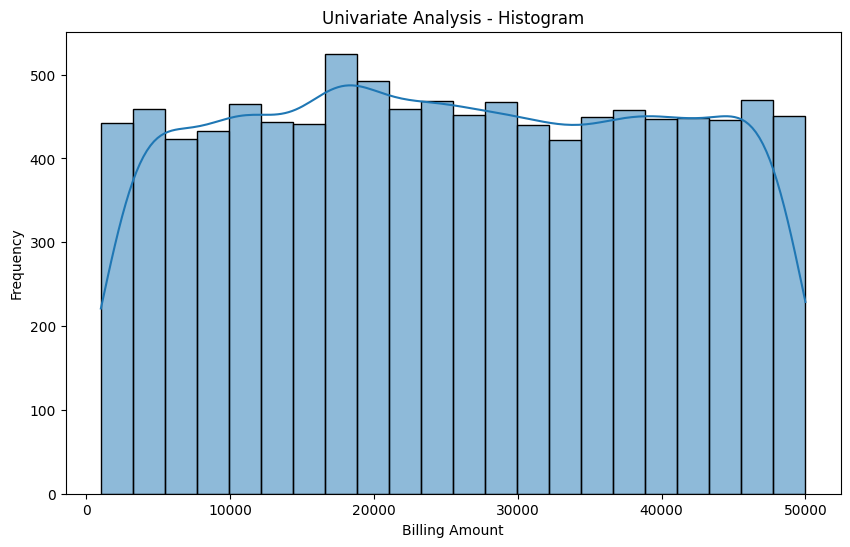

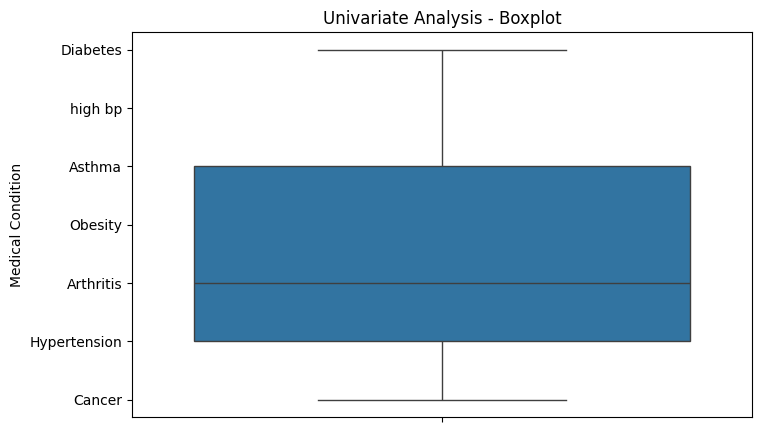

In [128]:
# Univariate Analysis - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], kde=True)  # Replace 'column_name' with a numerical column name
plt.title('Univariate Analysis - Histogram')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis - Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(df['Medical Condition'])  # Replace 'column_name' with the actual column name
plt.title('Univariate Analysis - Boxplot')
plt.show()


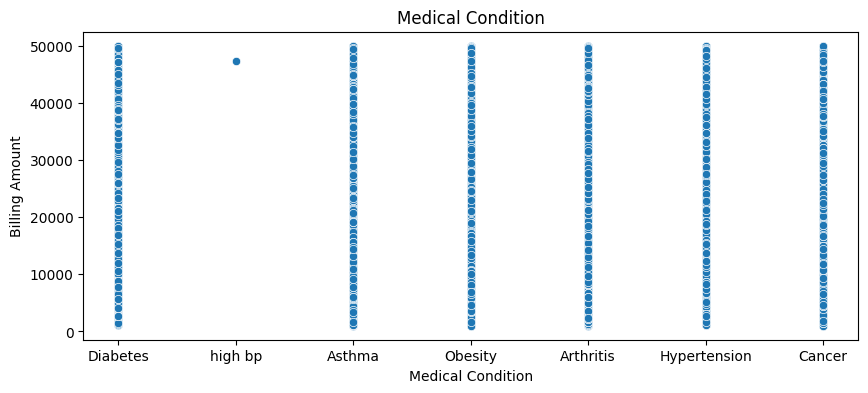

ValueError: could not convert string to float: 'Tiffany Ramirez'

<Figure size 1000x600 with 0 Axes>

In [129]:
# Bivariate Analysis - Scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Medical Condition', y='Billing Amount', data=df)  # Replace 'column1' and 'column2'
plt.title('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()

# Bivariate Analysis - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Bivariate Analysis - Correlation Heatmap')
plt.show()


# Univariate Analysis: Age Distribution
This graph shows the distribution of patients' ages. Most patients are between 75 and 79 years old.

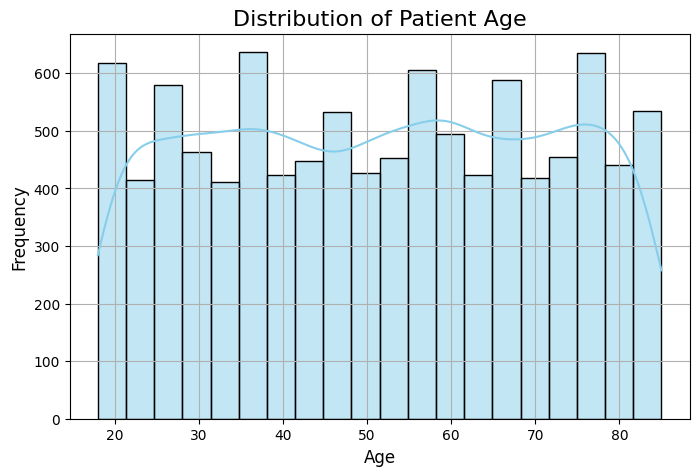

In [130]:
# Univariate analysis: Distribution of Age

# Plotting the distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')

# Adding labels and title
plt.title('Distribution of Patient Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


# Bivariate Analysis: Billing Amount vs Age
This graph explores the relationship between patient age and billing amounts, with a focus on gender differences.

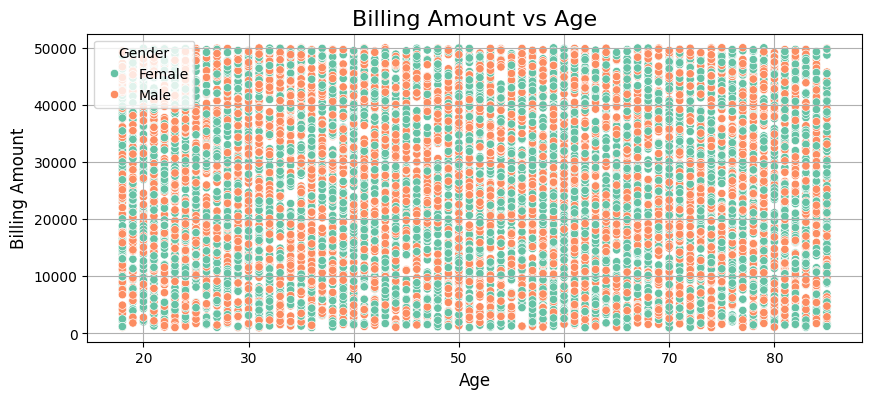

In [131]:
# Bivariate analysis: Billing Amount vs Age
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Age', y='Billing Amount', hue='Gender', palette='Set2')

# Adding labels and title
plt.title('Billing Amount vs Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Billing Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', loc='upper left')
plt.grid(True)
plt.show()


# Time Series Analysis: Admissions Over Time
We analyze the number of admissions over time. There are peaks in admissions during certain periods.

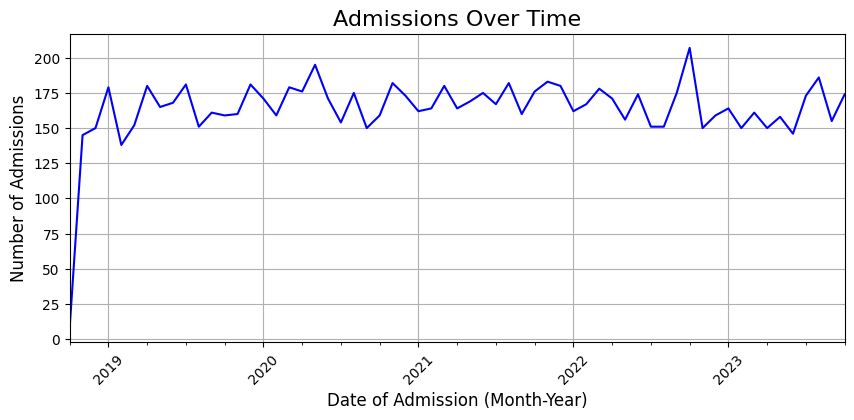

In [132]:
# Time series analysis: Admissions Over Time
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Grouping data by month and year
admissions_over_time = df.groupby(df['Date of Admission'].dt.to_period('M')).size()

# Plotting admissions over time
plt.figure(figsize=(10,4))
admissions_over_time.plot(kind='line', color='blue')

# Adding labels and title
plt.title('Admissions Over Time', fontsize=16)
plt.xlabel('Date of Admission (Month-Year)', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


# Bivariate Analysis: Test Results by Medical Condition
This graph explores the relationship between test results by medical condition.

<ipython-input-133-beb1eea67ec0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




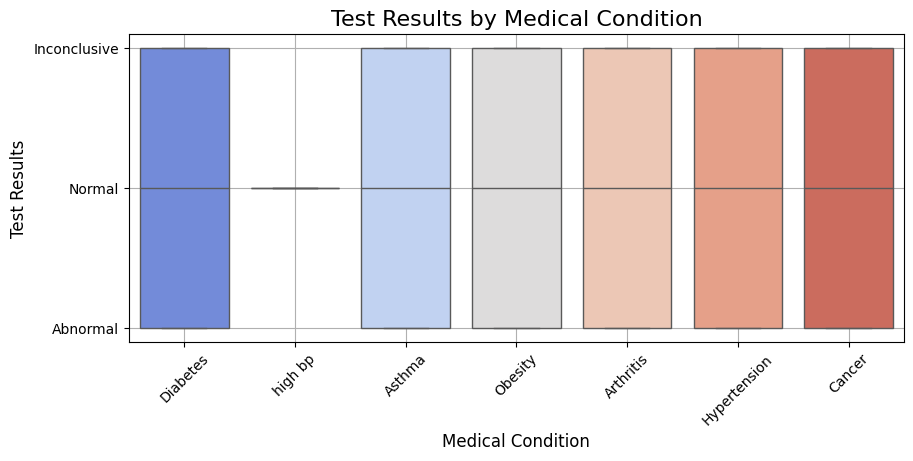

In [133]:
# Optimized graph: Test Results by Medical Condition
plt.figure(figsize=(10,4))
sns.boxplot(df, x='Medical Condition', y='Test Results', palette='coolwarm')

# Adding labels and title
plt.title('Test Results by Medical Condition', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Test Results', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()


# Bivariate Analysis: Age vs Test Results by gender
This graph explores the relationship between age vs test results by medical condition.

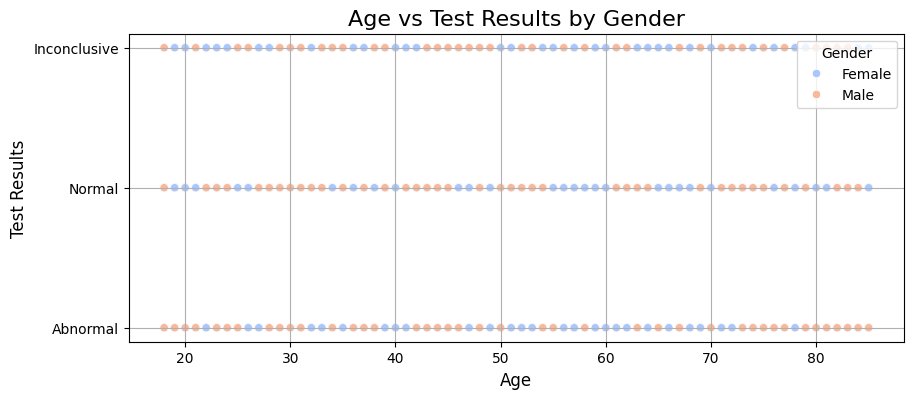

In [134]:
# Bivariate analysis: Age vs Test Results, colored by Gender
plt.figure(figsize=(10,4))
sns.scatterplot(df, x='Age', y='Test Results', hue='Gender', palette='coolwarm')

# Adding labels and title
plt.title('Age vs Test Results by Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Test Results', fontsize=12)
plt.grid(True)
plt.legend(title='Gender', loc='upper right')
plt.show()


# Univariate Analysis: Gender Distribution
This graph shows the distribution of patients' gender. Ratio of female patients are high.

<ipython-input-135-ff6530bac52e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




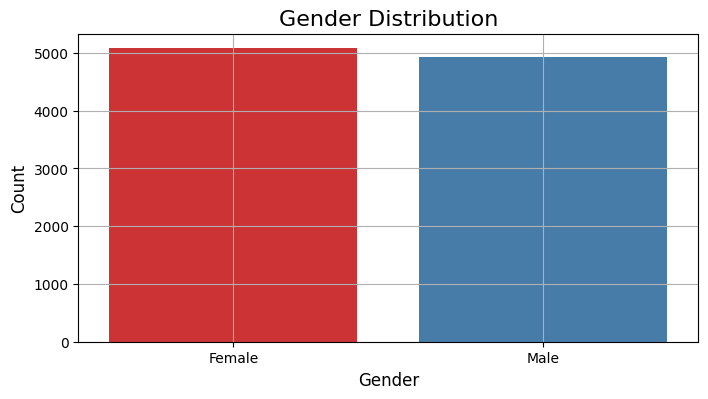

In [135]:
# Univariate analysis: Gender Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Gender', palette='Set1')

# Adding labels and title
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()


# Impact of Removing Outliers: Billing Amount
Here, we visualize the effect of removing outliers from the 'Billing Amount' column, using the IQR method.


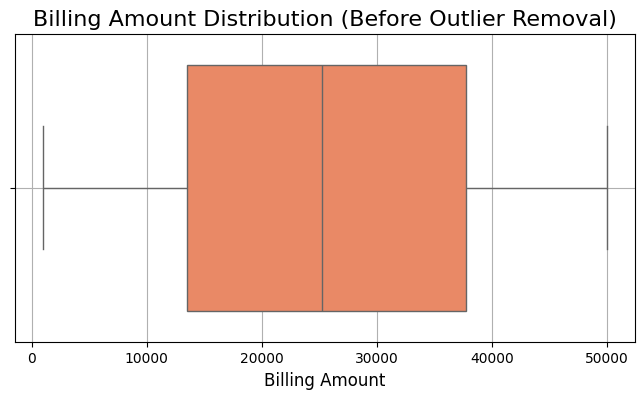

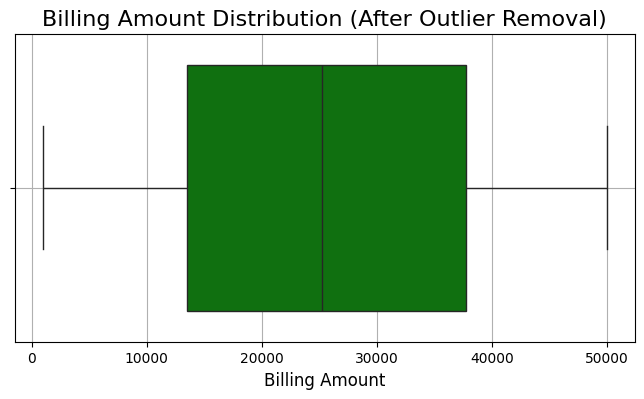

In [136]:
# Checking for outliers in Billing Amount
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Billing Amount', color='coral')

# Adding labels and title
plt.title('Billing Amount Distribution (Before Outlier Removal)', fontsize=16)
plt.xlabel('Billing Amount', fontsize=12)
plt.grid(True)
plt.show()

# Removing outliers using IQR method
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = df[~((df['Billing Amount'] < (Q1 - 1.5 * IQR)) | (df['Billing Amount'] > (Q3 + 1.5 * IQR)))]

# Plotting after removing outliers
plt.figure(figsize=(8,4))
sns.boxplot(data=df_filtered, x='Billing Amount', color='green')

# Adding labels and title
plt.title('Billing Amount Distribution (After Outlier Removal)', fontsize=16)
plt.xlabel('Billing Amount', fontsize=12)
plt.grid(True)
plt.show()


# **Interactive graphs using plotly library**






# Univariate Analysis: Age Distribution
This graph shows the distribution of patients' ages. Most patients are between 75 and 79 years old.

In [137]:
import plotly.express as px

# Interactive histogram of Age
fig = px.histogram(df, x='Age', nbins=20, title='Age Distribution of Patients', color_discrete_sequence=['blue'])

# Update layout for better visibility
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    title_font_size=20
)

# Display the plot
fig.show()


# Bivariate Analysis:  Patient's Age vs Billing Amount by Gender
This graph explores the relationship between patient age and billing amounts, with a focus on gender differences.

In [138]:
# Interactive scatter plot: Age vs Billing Amount
fig = px.scatter(df, x='Age', y='Billing Amount', color='Gender', title='Age vs Billing Amount by Gender')

# Update layout
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Billing Amount",
    title_font_size=20,
    legend_title="Gender"
)

# Display the plot
fig.show()



# Interactive box plot: Billing Amount by Medical Condition
This graph explores the relationship between patient age and billing amounts, with a focus on gender differences..


In [148]:
# Interactive box plot: Billing Amount by Medical Condition
fig = px.box(df, x='Medical Condition', y='Billing Amount', title='Billing Amount by Medical Condition', color='Medical Condition')

# Update layout
fig.update_layout(
    xaxis_title="Medical Condition",
    yaxis_title="Billing Amount",
    title_font_size=20,
    xaxis_tickangle=-45
)

# Display the plot
fig.show()


# **An interactive bar plot Medical Conditions by Gender**

In [149]:
import plotly.express as px

# Grouping the data by 'Medical Condition' and 'Gender'
medical_condition_gender = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

# Creating an interactive bar plot
fig = px.bar(medical_condition_gender,
             x='Medical Condition',
             y='Count',
             color='Gender',
             title="Medical Conditions by Gender",
             labels={'Medical Condition': 'Medical Condition', 'Count': 'Number of Patients'})

fig.show()


# **An interactive scatter plot between Age vs Billing Amount by Gender**

In [150]:
# Creating an interactive scatter plot
fig = px.scatter(df,
                 x='Age',
                 y='Billing Amount',
                 color='Gender',
                 title="Age vs Billing Amount by Gender",
                 labels={'Age': 'Patient Age', 'Billing Amount': 'Billing Amount ($)'})

fig.show()


# **An interactive line plot for time series analysis between admissions over time**

In [151]:
# Convert 'Date of Admission' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Group by date to count admissions per day
admissions_over_time = df.groupby('Date of Admission').size().reset_index(name='Admissions')

# Creating an interactive line plot for time series analysis
fig = px.line(admissions_over_time,
              x='Date of Admission',
              y='Admissions',
              title="Admissions Over Time",
              labels={'Date of Admission': 'Date', 'Admissions': 'Number of Admissions'})

fig.show()
